In [ ]:
# Time Series

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import datetime
from datetime import datetime

In [2]:
# Get current date in YYYY-MM-DD format
current_date = datetime.now().strftime('%Y-%m-%d')

In [4]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_oil = pd.read_csv('data/oil.csv')
df_stores = pd.read_csv('data/stores.csv')
df_transactions = pd.read_csv('data/transactions.csv')
df_holidays = pd.read_csv('data/holidays_events.csv')

In [5]:
# Initial exploration
print("\nTrain Data Info:")
print(df_train.info())
print("\nTrain Data Sample:")
print(df_train.head())

print("\nMissing Values in Train:")
print(df_train.isnull().sum())


Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None

Train Data Sample:
   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

Missing Values in Train:
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64


In [6]:
print("\nUnique values in each column:")
for col in df_train.columns:
    print(f"\n{col}: {df_train[col].nunique()} unique values")

# Basic statistics of sales
print("\nSales Statistics:")
print(df_train['sales'].describe())

# Check date range
print("\nDate Range:")
print(f"Start Date: {df_train['date'].min()}")
print(f"End Date: {df_train['date'].max()}")



Unique values in each column:

id: 3000888 unique values

date: 1684 unique values

store_nbr: 54 unique values

family: 33 unique values

sales: 379610 unique values

onpromotion: 362 unique values

Sales Statistics:
count    3.000888e+06
mean     3.577757e+02
std      1.101998e+03
min      0.000000e+00
25%      0.000000e+00
50%      1.100000e+01
75%      1.958473e+02
max      1.247170e+05
Name: sales, dtype: float64

Date Range:
Start Date: 2013-01-01
End Date: 2017-08-15


In [7]:
# Convert date column
df_train['date'] = pd.to_datetime(df_train['date'])
df_oil['date'] = pd.to_datetime(df_oil['date'])
df_holidays['date'] = pd.to_datetime(df_holidays['date'])


In [ ]:
# Time series analysis
daily_sales = df_train.groupby('date')['sales'].sum().reset_index()
plt.figure(figsize=(15,5))
plt.plot(daily_sales['date'], daily_sales['sales'])
plt.title('Daily Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
#df_train.isnull().sum()
# Display only the column names where there are missing values
df_train_columns_with_missing_values = df_train.columns[df_train.isnull().sum() > 0]
print(df_train_columns_with_missing_values)

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


In [11]:
# Identify categorical columns
categorical_columns = df_train.select_dtypes(include=['object']).columns
print("Categorical columns:", list(categorical_columns))

Categorical columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [12]:
# Identify numerical columns
numerical_columns = df_train.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical columns:", list(numerical_columns))


Numerical columns: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [13]:
# Print value counts for each categorical column
print("\nValue counts for each categorical column:")
print("==========================================")
for categorical_column in categorical_columns:
    print(f"\nColumn: {categorical_column}")
    print(df_train[categorical_column].value_counts())
    print("Null values:", df_train[categorical_column].isnull().sum())
    print("------------------------------------------------------")


Value counts for each categorical column:

Column: MSZoning
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
Null values: 0
------------------------------------------------------

Column: Street
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
Null values: 0
------------------------------------------------------

Column: Alley
Alley
Grvl    50
Pave    41
Name: count, dtype: int64
Null values: 1369
------------------------------------------------------

Column: LotShape
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
Null values: 0
------------------------------------------------------

Column: LandContour
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
Null values: 0
------------------------------------------------------

Column: Utilities
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
Null values: 0
-----------------------

In [19]:
#Initialize transformers
# cat_imputer = SimpleImputer(strategy='most_frequent')
# num_imputer = SimpleImputer(strategy='median')
# encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# scaler = StandardScaler()

# Initialize transformers
cat_imputer = SimpleImputer(strategy='constant', fill_value='None')
num_imputer = SimpleImputer(strategy='median')
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
scaler = StandardScaler()

In [20]:
def get_categorical_numerical_columns(df):
    """Identify categorical and numerical columns"""
    # Identify categorical and numerical columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

    # Exclude 'Id' and 'SalePrice' from features
    numerical_columns = numerical_columns.drop(['Id', 'SalePrice'] if 'SalePrice' in numerical_columns else ['Id'])

    return list(categorical_columns), list(numerical_columns)

In [21]:
def process_numerical(df, is_training=True):
    """Handle missing values in numerical columns"""
    global num_imputer, scaler
    _, numerical_columns = get_categorical_numerical_columns(df)

    if is_training:
        num_imputer = SimpleImputer(strategy='median')
        scaler = StandardScaler()
        df[numerical_columns] = num_imputer.fit_transform(df[numerical_columns])
        df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
    else:
        df[numerical_columns] = num_imputer.transform(df[numerical_columns])
        df[numerical_columns] = scaler.transform(df[numerical_columns])

    return df

In [22]:
def scale_features(df, is_training=True):
    """Scale numerical features"""
    global scaler  # Make it accessible for both training and test
    _, numerical_columns = get_categorical_numerical_columns(df)

    if is_training:
        scaler = StandardScaler()
        df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
    else:
        df[numerical_columns] = scaler.transform(df[numerical_columns])

    return df

In [23]:
def process_categorical(df, is_training=True):
    """Handle missing values and encode categorical columns"""
    global cat_imputer, encoder
    categorical_columns, _ = get_categorical_numerical_columns(df)

    # High cardinality or less important features to exclude
    exclude_columns = ['MiscFeature', 'Fence', 'PoolQC', 'Alley']
    encode_columns = [col for col in categorical_columns if col not in exclude_columns]

    if is_training:
        cat_imputer = SimpleImputer(strategy='constant', fill_value='None')
        df[encode_columns] = cat_imputer.fit_transform(df[encode_columns])

        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        encoded_features = encoder.fit_transform(df[encode_columns])
    else:
        df[encode_columns] = cat_imputer.transform(df[encode_columns])
        encoded_features = encoder.transform(df[encode_columns])

    # Create encoded DataFrame
    encoded_feature_names = encoder.get_feature_names_out(encode_columns)
    encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=df.index)

    # Drop original categorical columns and add encoded ones
    df = df.drop(columns=encode_columns)
    df = pd.concat([df, encoded_df], axis=1)

    return df


In [25]:
def feature_engineering(df):
    """Create new features"""
    df = df.copy()

    # Age of the house when sold
    df['Age'] = df['YrSold'] - df['YearBuilt']

    # Years since remodeling
    df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']

    # Total SF
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

    # Total bathrooms
    df['TotalBaths'] = df['FullBath'] + (0.5 * df['HalfBath']) + \
                       df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath'])

    # Total porch area
    df['TotalPorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + \
                         df['3SsnPorch'] + df['ScreenPorch']

    # Has features
    df['HasPool'] = (df['PoolArea'] > 0).astype(int)
    df['HasGarage'] = (df['GarageArea'] > 0).astype(int)
    df['HasFireplace'] = (df['Fireplaces'] > 0).astype(int)

    return df

In [26]:
def prepare_data(df, is_training=True):
    """Main function to prepare data"""
    # Create copy of dataframe
    df = df.copy()

    # Feature engineering
    df = feature_engineering(df)

    # Process numerical and categorical data
    df = process_numerical(df, is_training)
    df = process_categorical(df, is_training)

    # Drop unnecessary columns
    columns_to_drop = ['Id'] + ['MiscFeature', 'Fence', 'PoolQC', 'Alley']

    # Don't drop 'SalePrice' for training data
    if not is_training and 'SalePrice' in df.columns:
        columns_to_drop.append('SalePrice')

    df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

    return df

In [27]:
df_train_processed = prepare_data(df_train.copy(), is_training=True)
df_test_processed = prepare_data(df_test.copy(), is_training=False)

In [28]:
df_train_processed.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 295, dtype: int64

In [29]:
df_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 295 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(291), int32(3), int64(1)
memory usage: 3.3 MB


In [30]:
df_test_processed.isnull().sum()

Pclass          0
Age             0
SibSp           0
Parch           0
Fare            0
FamilySize      0
IsAlone         0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Title_Master    0
Title_Miss      0
Title_Mr        0
Title_Mrs       0
Title_Rare      0
dtype: int64

In [30]:
df_test_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 294 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(291), int32(3)
memory usage: 3.3 MB


In [31]:
correlation_matrix_train = df_train_processed.corr()
print(correlation_matrix_train)

                       MSSubClass  LotFrontage   LotArea  OverallQual  \
MSSubClass               1.000000    -0.356718 -0.139781     0.032628   
LotFrontage             -0.356718     1.000000  0.304522     0.234812   
LotArea                 -0.139781     0.304522  1.000000     0.105806   
OverallQual              0.032628     0.234812  0.105806     1.000000   
OverallCond             -0.059316    -0.053281 -0.005636    -0.091932   
...                           ...          ...       ...          ...   
SaleCondition_AdjLand    0.016241    -0.036570 -0.013208    -0.041677   
SaleCondition_Alloca     0.030002    -0.018040  0.008966    -0.044950   
SaleCondition_Family     0.000983     0.016250 -0.010781    -0.025515   
SaleCondition_Normal     0.024359    -0.074146  0.005711    -0.143282   
SaleCondition_Partial   -0.051068     0.127293  0.022635     0.323295   

                       OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
MSSubClass               -0.059316   0.027850   

In [33]:
print("\nCorrelations with SalePrice:")
print(correlation_matrix_train["SalePrice"].sort_values(ascending=False))


Correlations with SalePrice:
SalePrice           1.000000
OverallQual         0.790982
TotalSF             0.782260
GrLivArea           0.708624
GarageCars          0.640409
                      ...   
FireplaceQu_None   -0.471908
RemodAge           -0.509079
KitchenQual_TA     -0.519298
Age                -0.523350
ExterQual_TA       -0.589044
Name: SalePrice, Length: 295, dtype: float64


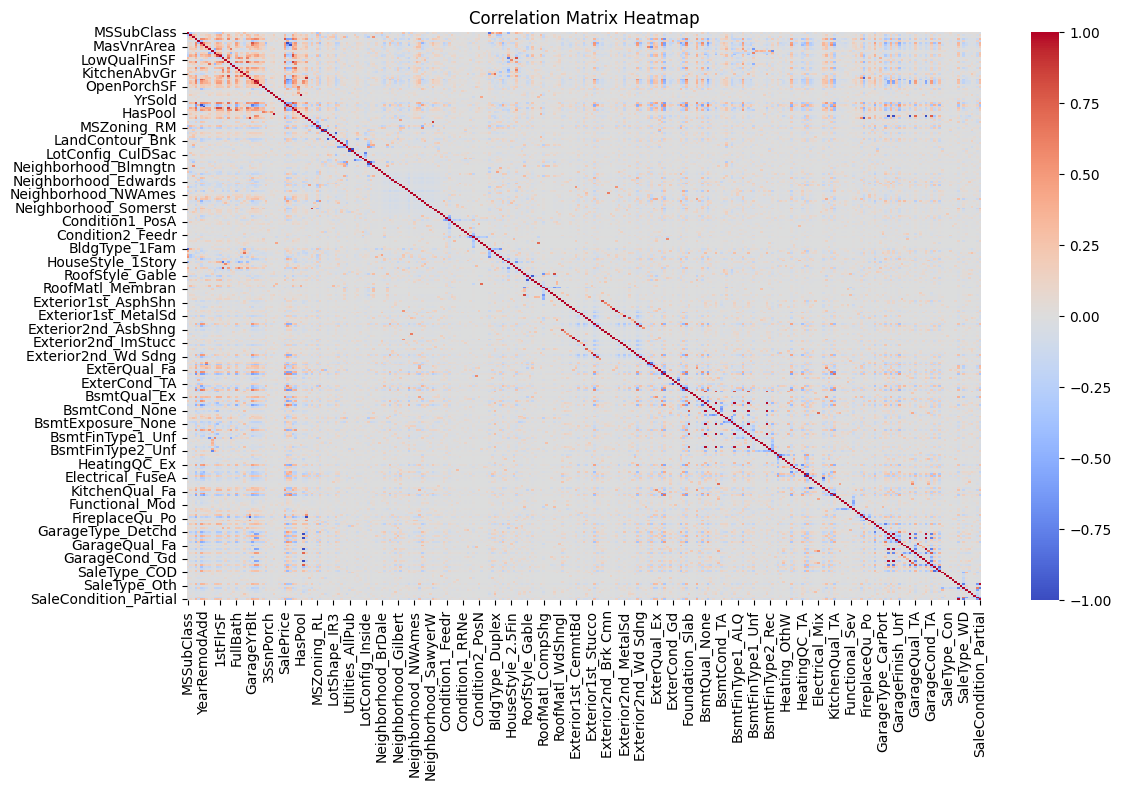

In [34]:
# Create correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_train, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [35]:
# For regression, we might want to log transform the target variable
df_train_processed['SalePrice'] = np.log1p(df_train_processed['SalePrice'])


In [36]:
# Prepare training data
X = df_train_processed.drop('SalePrice', axis=1)
y = df_train_processed['SalePrice']  # Log-transformed target

# Save Id from test data (for submission)
test_ids = df_test['Id']
X_test = df_test_processed

print("Training features shape:", X.shape)
print("Training target shape:", y.shape)
print("Test features shape:", X_test.shape)

Training features shape: (1460, 294)
Training target shape: (1460,)
Test features shape: (1459, 294)


In [42]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Ensure balanced split for binary classification
)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (712, 17)
Validation set shape: (179, 17)
Test set shape: (418, 17)


In [37]:
# Quick look at the data
print("\nFeature columns:", X.columns.tolist())
print("\nFirst few rows of training features:")
print(X.head())

# Split the data into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)


Feature columns: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Age', 'RemodAge', 'TotalSF', 'TotalBaths', 'TotalPorchSF', 'HasPool', 'HasGarage', 'HasFireplace', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Insid

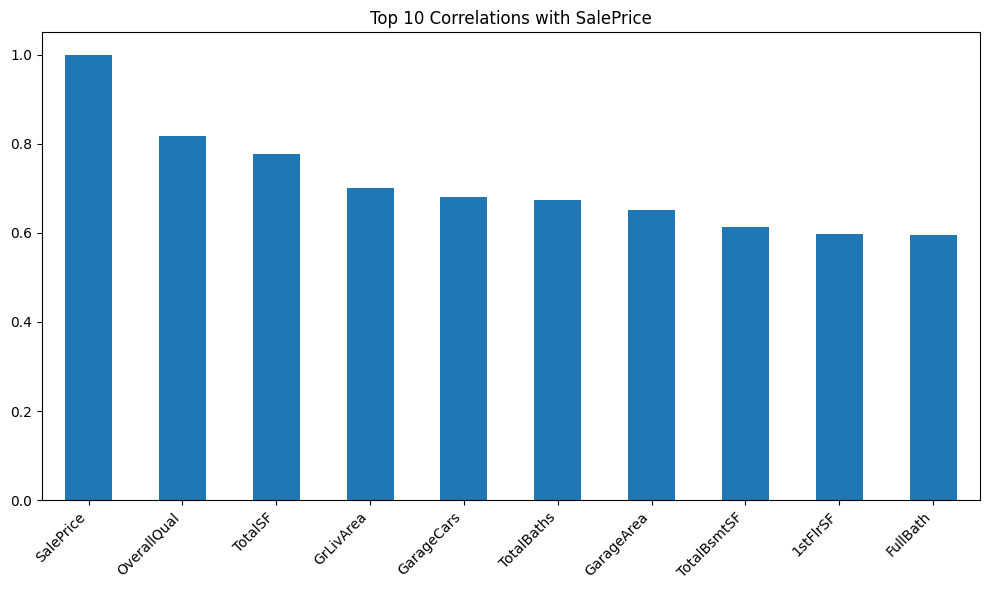

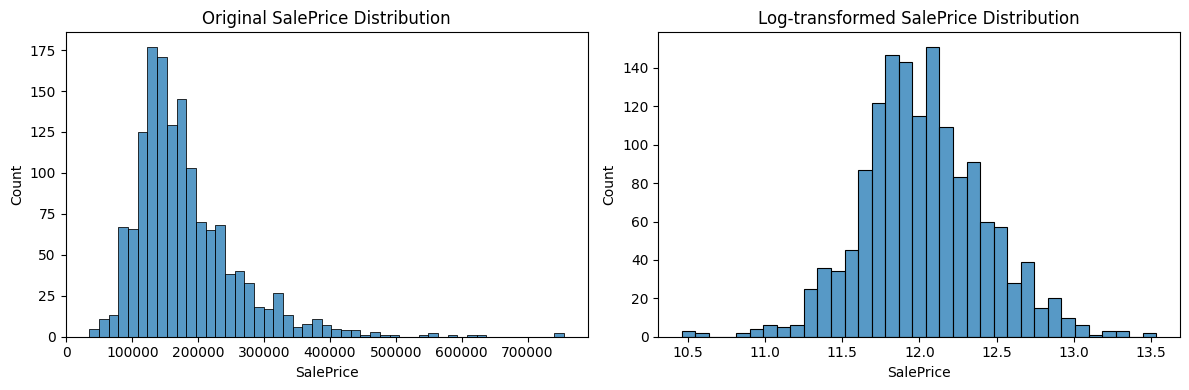

In [38]:
# Optional: Create a function to visualize the most important correlations
def plot_top_correlations(df, target='SalePrice', top_n=10):
    correlations = df.corr()[target].sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    correlations[:top_n].plot(kind='bar')
    plt.title(f'Top {top_n} Correlations with {target}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot top correlations
plot_top_correlations(df_train_processed)

# Optional: Distribution of target variable before and after log transformation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Original distribution
sns.histplot(df_train['SalePrice'], ax=ax1)
ax1.set_title('Original SalePrice Distribution')

# Log-transformed distribution
sns.histplot(df_train_processed['SalePrice'], ax=ax2)
ax2.set_title('Log-transformed SalePrice Distribution')

plt.tight_layout()
plt.show()

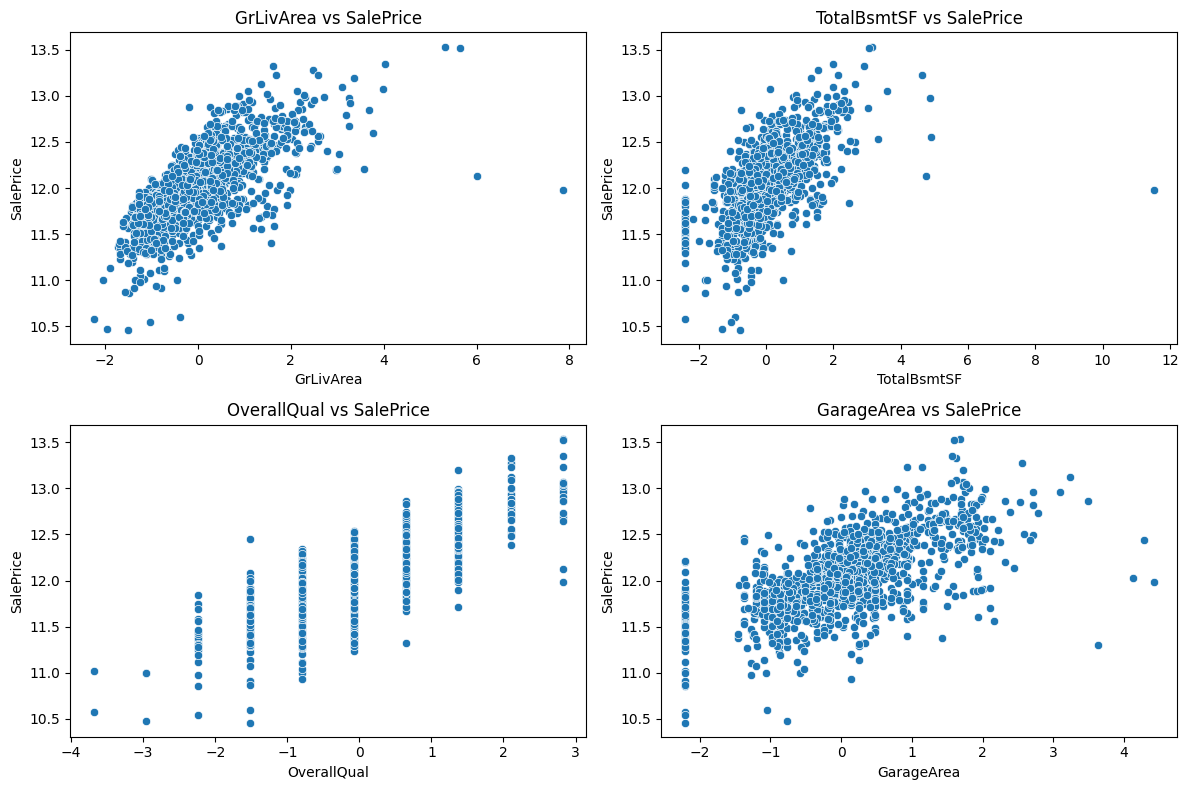

In [39]:
# Scatter plots of important numerical features vs SalePrice
def plot_scatter_with_price(df, features, target='SalePrice'):
    n = len(features)
    fig, axes = plt.subplots(n//2, 2, figsize=(12, 4*n//2))
    axes = axes.ravel()

    for idx, feature in enumerate(features):
        sns.scatterplot(data=df, x=feature, y=target, ax=axes[idx])
        axes[idx].set_title(f'{feature} vs {target}')

    plt.tight_layout()
    plt.show()

important_features = ['GrLivArea', 'TotalBsmtSF', 'OverallQual', 'GarageArea']
plot_scatter_with_price(df_train_processed, important_features)

In [40]:
def detect_outliers(df, column, n_std=3):
    mean = df[column].mean()
    std = df[column].std()
    outliers = df[(df[column] < mean - n_std * std) | 
                  (df[column] > mean + n_std * std)]
    return outliers

# Check for outliers in important features
for feature in important_features:
    outliers = detect_outliers(df_train_processed, feature)
    print(f"\nOutliers in {feature}:")
    print(outliers[[feature, 'SalePrice']])


Outliers in GrLivArea:
      GrLivArea  SalePrice
118    3.248687  12.676079
185    3.983504  13.071072
197    3.039283  12.367345
304    3.764582  12.594734
496    3.260109  12.971543
523    6.016627  12.126764
608    3.195384  12.791359
635    3.578022  12.206078
691    5.331304  13.534474
769    3.357196  13.195616
798    3.092585  13.091906
1169   4.019674  13.345509
1182   5.635892  13.521141
1268   3.677013  12.850557
1298   7.855574  11.982935
1353   3.279145  12.923915

Outliers in TotalBsmtSF:
      TotalBsmtSF  SalePrice
224      3.043108  12.864243
332      4.899204  12.556733
440      4.643820  13.226725
496      4.885522  12.971543
523      4.744149  12.126764
691      3.161680  13.534474
1044     3.344097  12.535380
1182     3.052229  13.521141
1298    11.520949  11.982935
1373     3.592640  13.053015

Outliers in OverallQual:
     OverallQual  SalePrice
375    -3.688413  11.018646
533    -3.688413  10.579005

Outliers in GarageArea:
      GarageArea  SalePrice
178     3

In [35]:
### Train

In [43]:
# Cell 10: Train XGBoost model
import xgboost as xgb

In [44]:
# Define hyperparameters for regression
hyperparameters = {
    'n_estimators': 500,
    'max_depth': 5,
    'learning_rate': 0.01,
    'subsample': 0.8,
    'colsample_bytree': 0.9,
    'random_state': 42,
    'tree_method': 'hist',  # Faster tree method
    'eval_metric': 'rmse',  # For regression
    'early_stopping_rounds': 20,  # Stop if no improvement after 20 rounds
    'verbosity': 1,  # Show some training information
    'objective': 'reg:squarederror'  # For regression
}

# 'eval_metric': 'rmse',  # Instead of 'logloss'
# 'objective': 'reg:squarederror'  # Instead of binary classification

In [45]:
# Create and train the model
model = xgb.XGBRegressor(**hyperparameters)

# Fit with evaluation set
model.fit(
    X_train, 
    y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=True
)


[0]	validation_0-rmse:0.38724	validation_1-rmse:0.42996
[1]	validation_0-rmse:0.38406	validation_1-rmse:0.42676
[2]	validation_0-rmse:0.38094	validation_1-rmse:0.42347
[3]	validation_0-rmse:0.37791	validation_1-rmse:0.42043
[4]	validation_0-rmse:0.37487	validation_1-rmse:0.41731
[5]	validation_0-rmse:0.37186	validation_1-rmse:0.41425
[6]	validation_0-rmse:0.36886	validation_1-rmse:0.41127
[7]	validation_0-rmse:0.36586	validation_1-rmse:0.40814
[8]	validation_0-rmse:0.36294	validation_1-rmse:0.40518
[9]	validation_0-rmse:0.36019	validation_1-rmse:0.40248
[10]	validation_0-rmse:0.35729	validation_1-rmse:0.39942
[11]	validation_0-rmse:0.35443	validation_1-rmse:0.39644
[12]	validation_0-rmse:0.35163	validation_1-rmse:0.39357
[13]	validation_0-rmse:0.34885	validation_1-rmse:0.39075
[14]	validation_0-rmse:0.34612	validation_1-rmse:0.38800
[15]	validation_0-rmse:0.34336	validation_1-rmse:0.38528
[16]	validation_0-rmse:0.34065	validation_1-rmse:0.38249
[17]	validation_0-rmse:0.33803	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=20,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [46]:
# Make predictions on validation set
y_pred = model.predict(X_val)

In [48]:
# Print model performance
print("\nModel Performance on Validation Set:")
print("====================================")

# Calculate metrics
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print(f"\nRMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Model Performance on Validation Set:

RMSE: 0.1373
R² Score: 0.8990


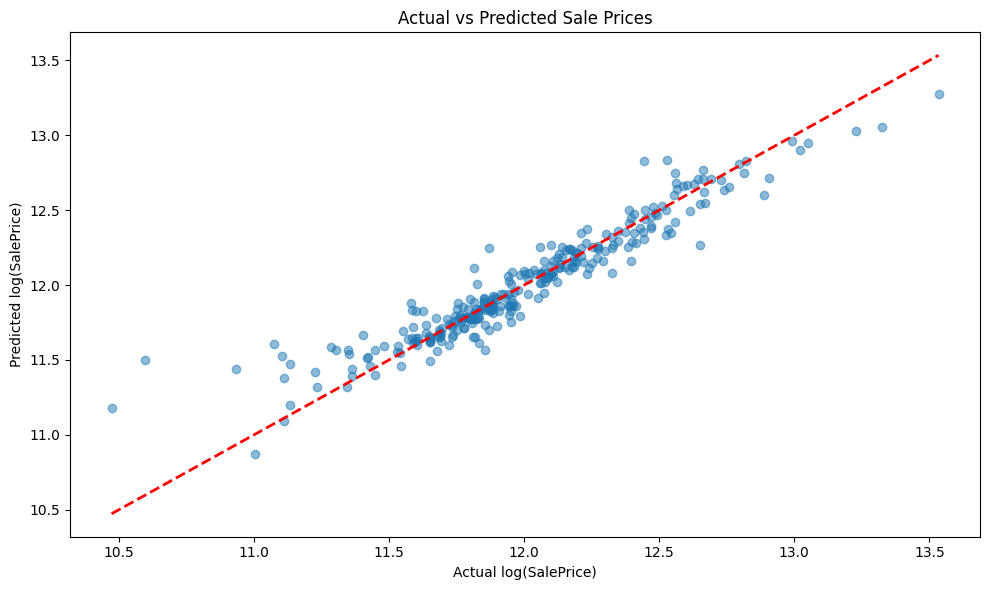

In [49]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual log(SalePrice)')
plt.ylabel('Predicted log(SalePrice)')
plt.title('Actual vs Predicted Sale Prices')
plt.tight_layout()
plt.show()


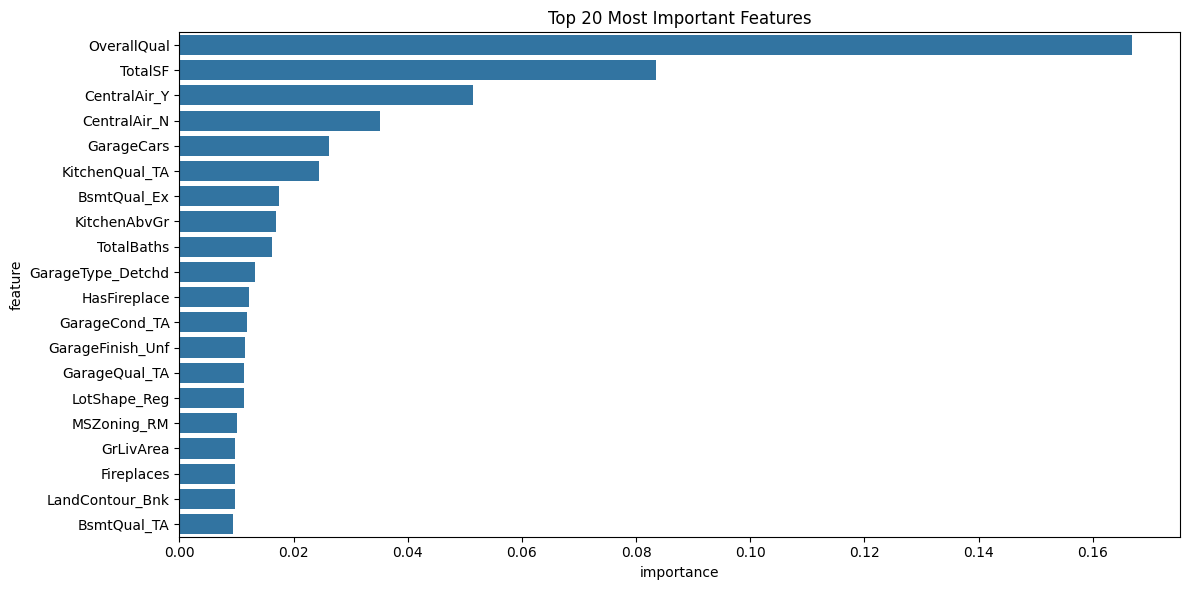

In [50]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance (top 20 features)
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Most Important Features')
plt.tight_layout()
plt.show()

In [51]:
# Make predictions on test set
test_predictions = model.predict(X_test)

In [52]:
# Convert predictions back to original scale (if you used log transformation)
test_predictions_original = np.expm1(test_predictions)

# Create submission file
submission = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': test_predictions_original
})

In [54]:
# Save processed training data with target
df_train_processed_with_target = X.copy()
df_train_processed_with_target['SalePrice'] = y
df_train_processed_with_target.to_csv(f'data-out/train-processed-{current_date}.csv', index=False)

# Save processed test data
X_test.to_csv(f'data-out/test-processed-{current_date}.csv', index=False)

In [55]:
submission.to_csv(f'data-out/predictions-{current_date}.csv', index=False)
print(f"Saved submission to: data-out/predictions-{current_date}.csv")

Saved submission to: data-out/predictions-2024-12-17.csv


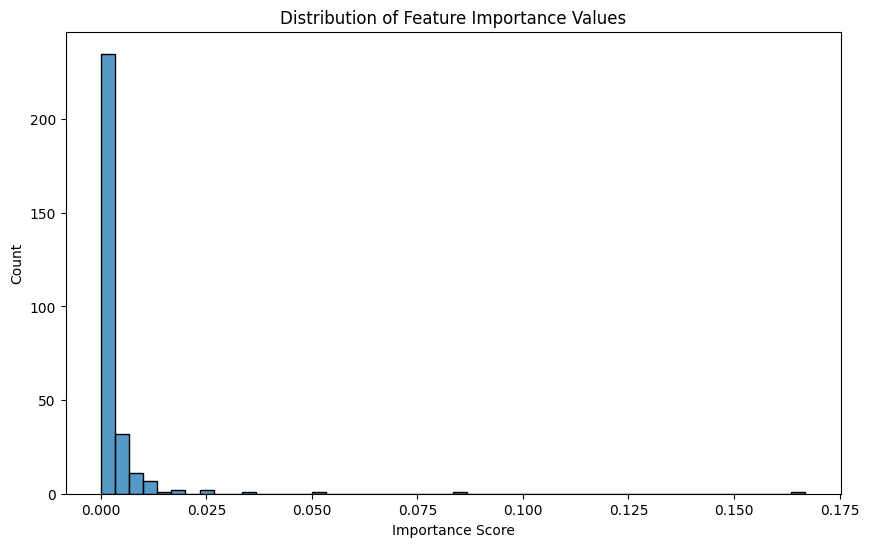

In [56]:
# Additional visualization: Feature importance distribution
plt.figure(figsize=(10, 6))
sns.histplot(feature_importance['importance'], bins=50)
plt.title('Distribution of Feature Importance Values')
plt.xlabel('Importance Score')
plt.ylabel('Count')
plt.show()


In [57]:
# Print top 20 most important features
print("\nTop 20 Most Important Features:")
print("===============================")
print(feature_importance.head(20))


Top 20 Most Important Features:
               feature  importance
3          OverallQual    0.166917
38             TotalSF    0.083495
229       CentralAir_Y    0.051410
228       CentralAir_N    0.035118
25          GarageCars    0.026256
239     KitchenQual_TA    0.024462
188        BsmtQual_Ex    0.017398
21        KitchenAbvGr    0.016870
39          TotalBaths    0.016185
258  GarageType_Detchd    0.013162
43        HasFireplace    0.012253
275      GarageCond_TA    0.011788
263   GarageFinish_Unf    0.011564
269      GarageQual_TA    0.011372
54        LotShape_Reg    0.011281
48         MSZoning_RM    0.010124
15           GrLivArea    0.009756
23          Fireplaces    0.009743
55     LandContour_Bnk    0.009712
192        BsmtQual_TA    0.009450


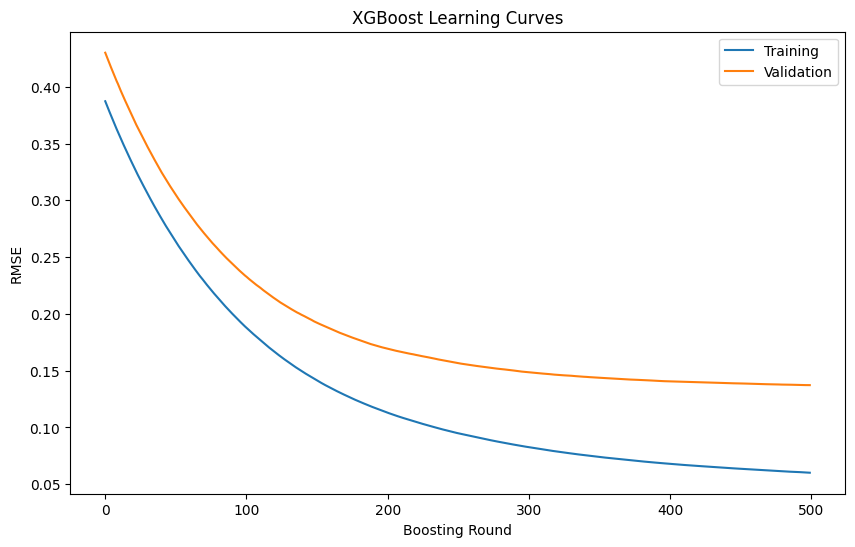

In [59]:
# Optional: Learning curves
evals_result = model.evals_result()

plt.figure(figsize=(10, 6))
plt.plot(evals_result['validation_0']['rmse'], label='Training')
plt.plot(evals_result['validation_1']['rmse'], label='Validation')
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.title('XGBoost Learning Curves')
plt.legend()
plt.show()